In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder=LabelEncoder()

In [8]:
df['gender']=encoder.fit_transform(df['gender'])
df['ever_married']=encoder.fit_transform(df['ever_married'])
df['Residence_type']=encoder.fit_transform(df['Residence_type'])
df['smoking_status']=encoder.fit_transform(df['smoking_status'])
df['work_type']=encoder.fit_transform(df['work_type'])

In [9]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [10]:
df.drop(['id'],axis=1,inplace=True)

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df['bmi']=df['bmi'].fillna(np.mean(df['bmi']))

In [14]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
## dividing dataset
x=df.drop(['stroke'],axis=1)
y=df['stroke']

In [16]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [17]:
## train and test dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
x_train_scaled=scaler.fit_transform(x_train)

In [23]:
x_test_scaled=scaler.transform(x_test)

<Axes: >

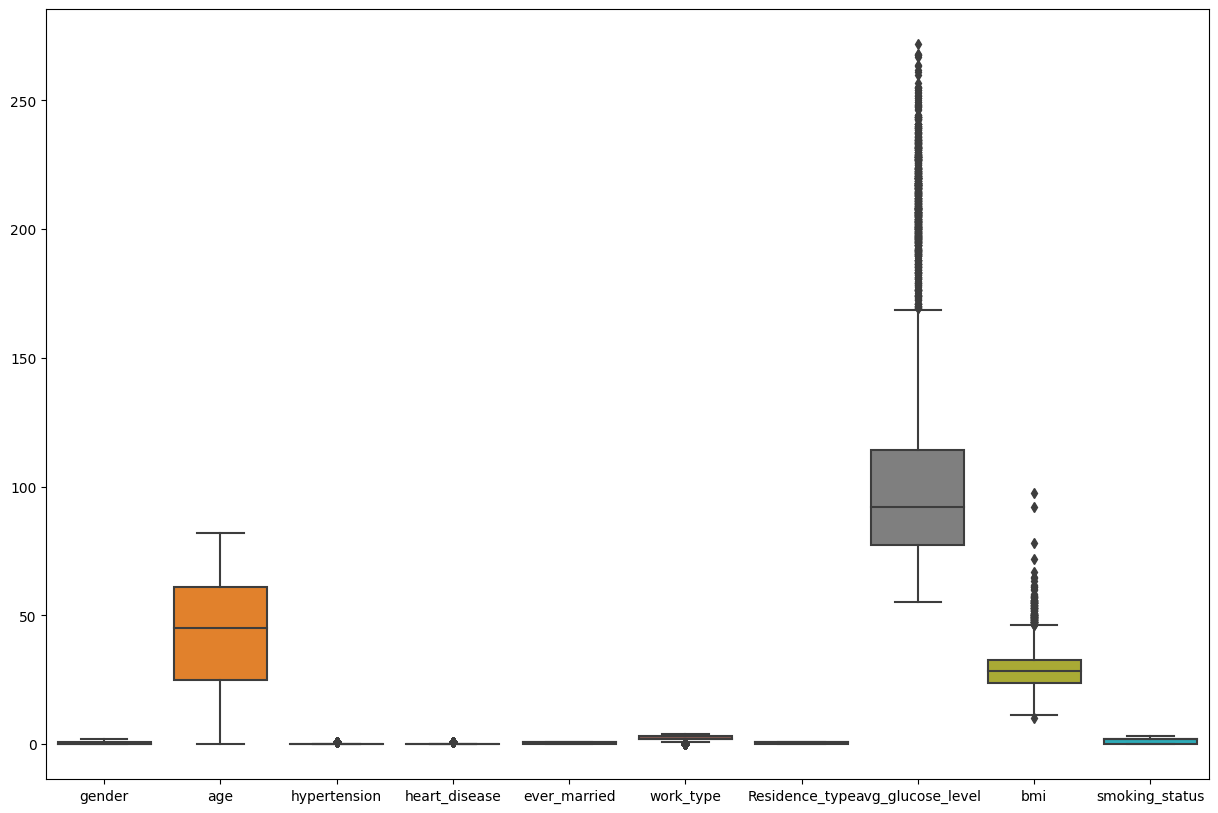

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x)

In [25]:
## lets train our moderl

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc=RandomForestClassifier()

In [28]:
parameter={'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300],
          'criterion':['gini','entropy']}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
rsc=RandomizedSearchCV(rfc,param_distributions=parameter,cv=5,verbose=3,scoring='accuracy')

In [31]:
rsc.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.955 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.955 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.955 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.955 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.955 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.955 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.955 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.955 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.955 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=300;, score=0.955 total time=   0.8s
[CV 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [32]:
rsc.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'}

In [33]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=10,criterion='gini')

In [34]:
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [35]:
y_pred=rfc.predict(x_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.9419439008480104

In [38]:
import pickle

In [40]:
pickle.dump(rfc,open('/config/workspace/pickle/rfc_heart_stroke.pkl','wb'))

In [42]:
pickle.dump(scaler,open('/config/workspace/pickle/scaler_heart_stroke.pkl','wb'))